In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import collections
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("loan_default_prediction_project.csv")

In [3]:
data.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,Non-Default,13068.330587,18.185533,59
1,46,NaN,37283.054601,Employed,Suburban,474,0.456731,40192.994312,Default,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,Default,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,Non-Default,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,Non-Default,41466.397989,18.891582,66


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 792 non-null    object 
 2   Income                 1000 non-null   float64
 3   Employment_Status      906 non-null    object 
 4   Location               1000 non-null   object 
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   object 
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


In [5]:
#checking for the columns
data.columns

Index(['Age', 'Gender', 'Income', 'Employment_Status', 'Location',
       'Credit_Score', 'Debt_to_Income_Ratio', 'Existing_Loan_Balance',
       'Loan_Status', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months'],
      dtype='object')

In [6]:
# checking for the categorical column 
categorical_data = [i for i in data.columns if data[i].dtype=="object"]
categorical_data

['Gender', 'Employment_Status', 'Location', 'Loan_Status']

In [7]:
# checking for the numerical column 
numerical_data = [i for i in data.columns if data[i].dtype!="object"]
numerical_data

['Age',
 'Income',
 'Credit_Score',
 'Debt_to_Income_Ratio',
 'Existing_Loan_Balance',
 'Loan_Amount',
 'Interest_Rate',
 'Loan_Duration_Months']

In [8]:
# checking for the discrete_numerical column 
discrete_numerical_data = [i for i in numerical_data if len(data[i].unique())<16]
discrete_numerical_data

[]

In [9]:
# checking for the continuous_numerical column 
continuous_numerical_data = [i for i in numerical_data if len(data[i].unique())>=16]
continuous_numerical_data

['Age',
 'Income',
 'Credit_Score',
 'Debt_to_Income_Ratio',
 'Existing_Loan_Balance',
 'Loan_Amount',
 'Interest_Rate',
 'Loan_Duration_Months']

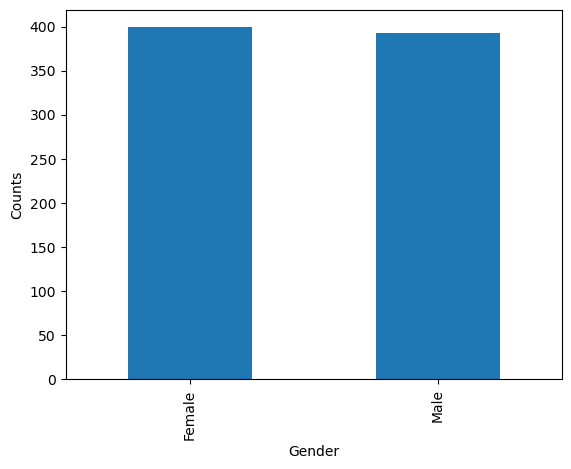

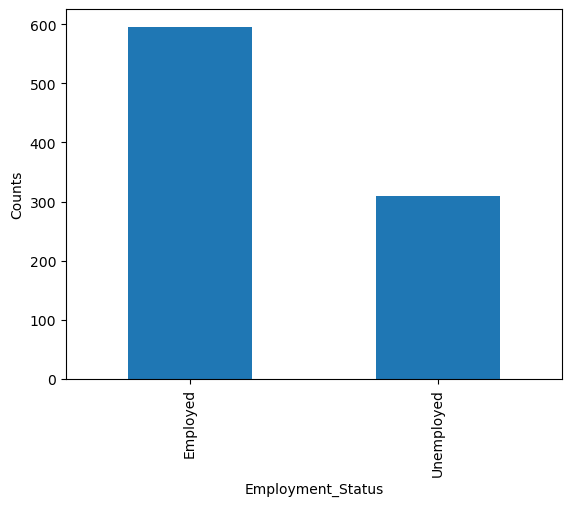

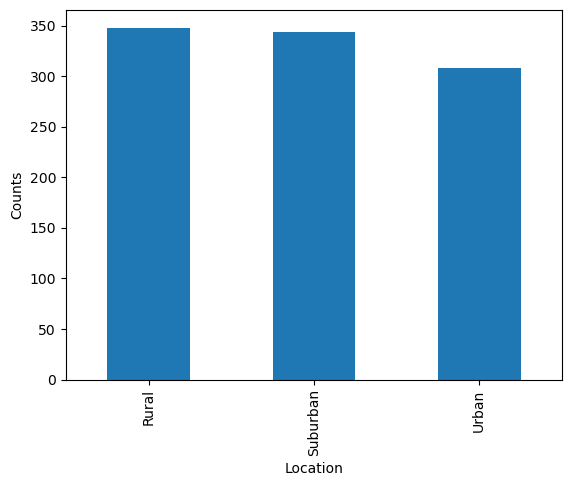

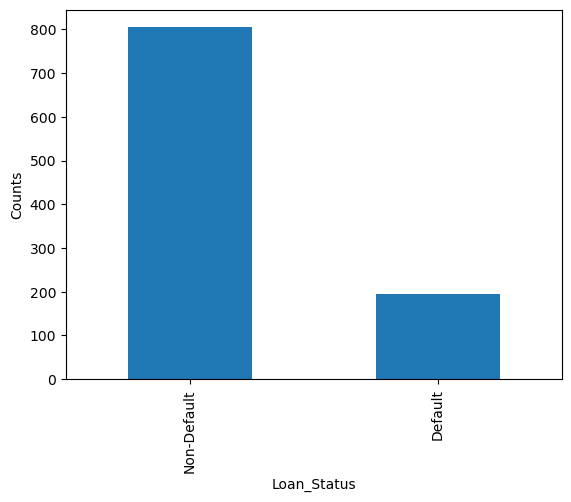

In [10]:
# For Categotical Data.
for i in categorical_data:
    data[i].value_counts().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("Counts")
    plt.show()

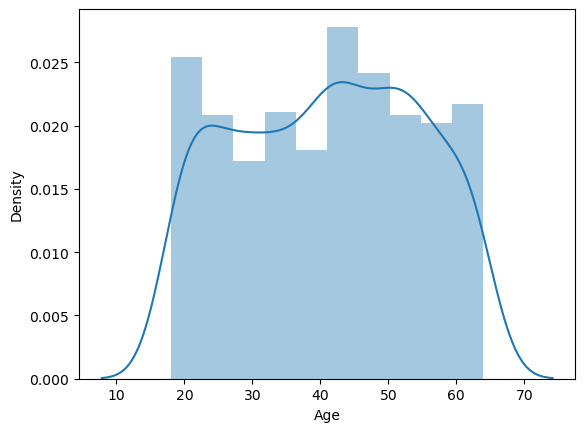

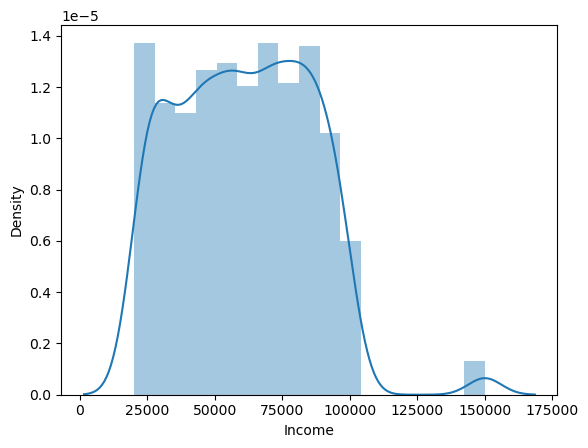

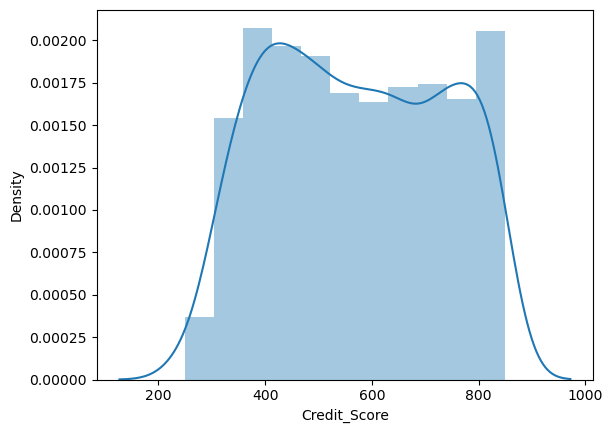

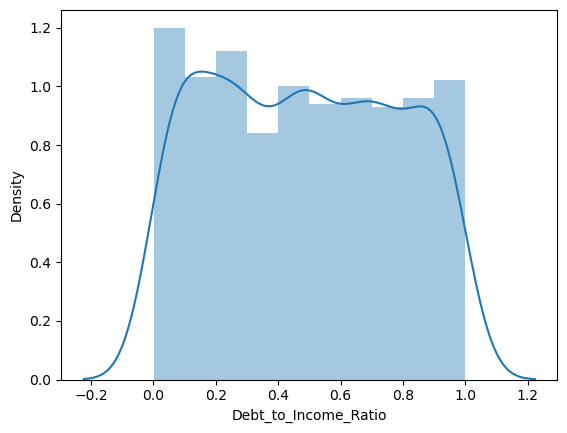

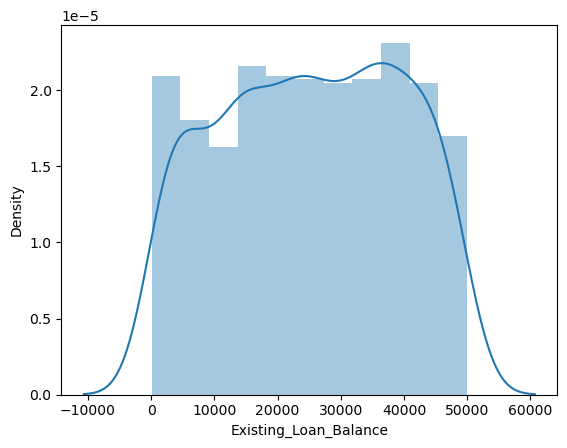

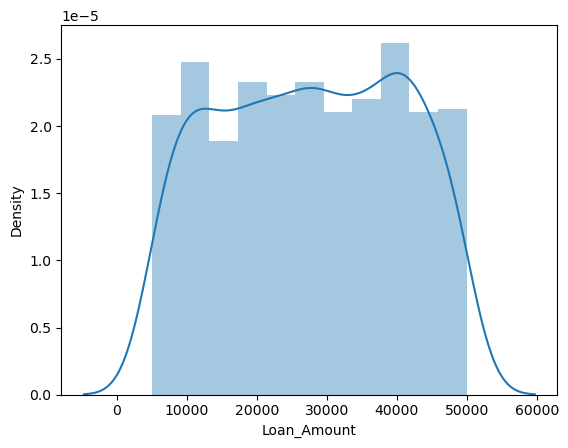

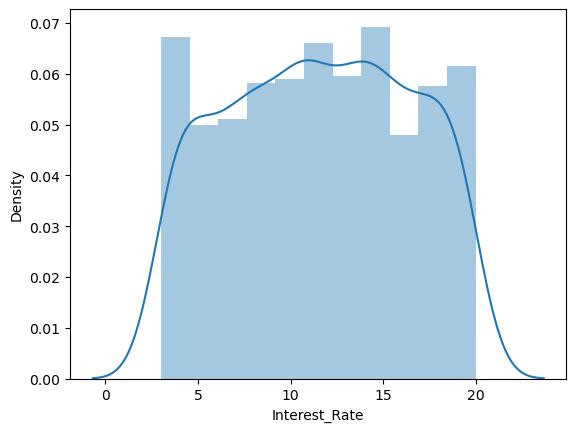

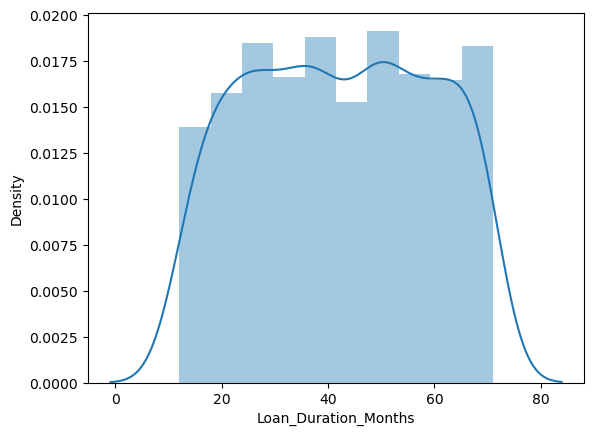

In [11]:
# For Continuous Numerical Data
for i in continuous_numerical_data:
    sns.distplot(data[i])
    plt.xlabel(i)
    plt.show()

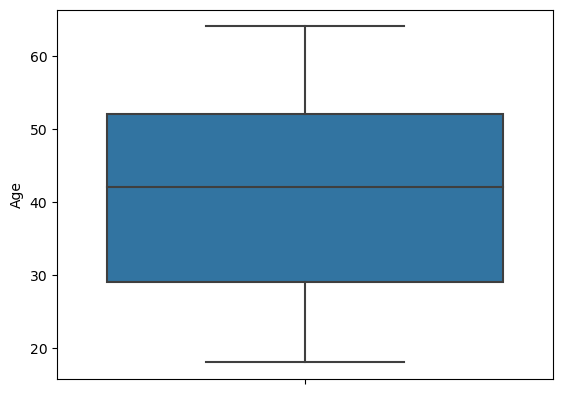

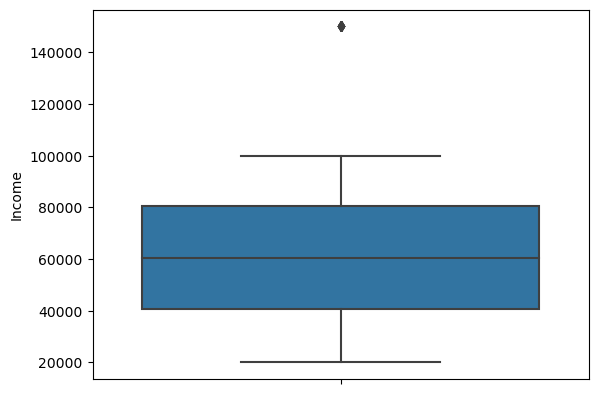

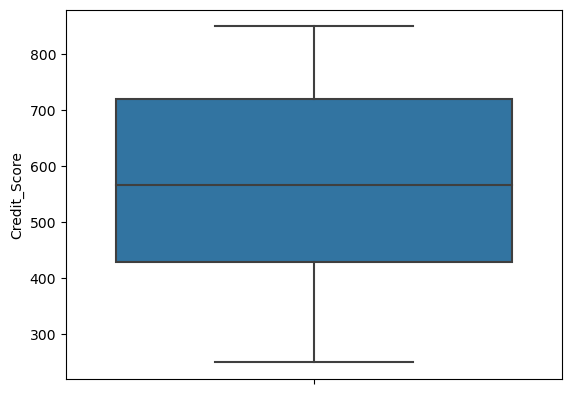

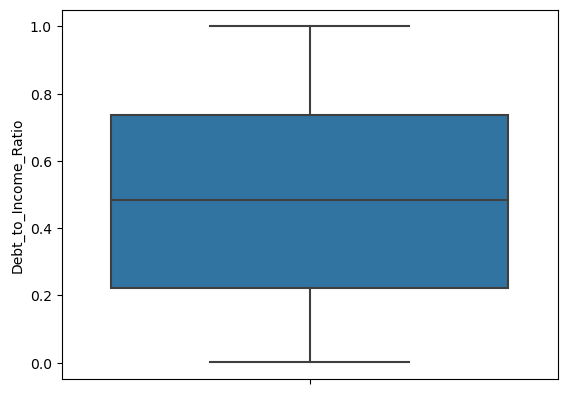

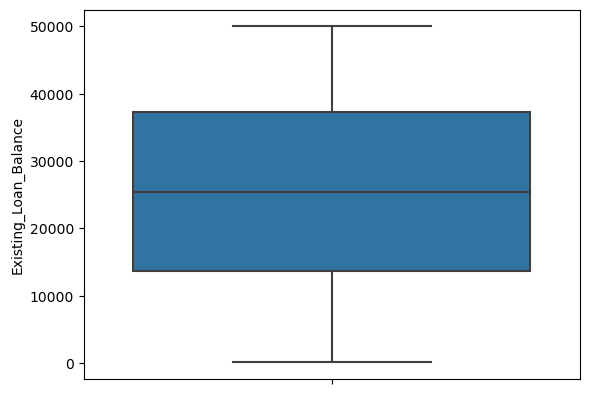

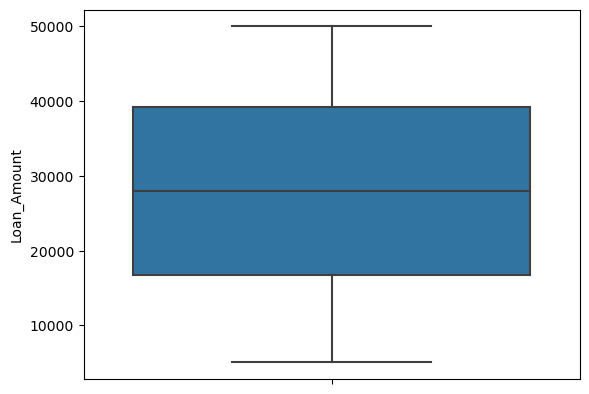

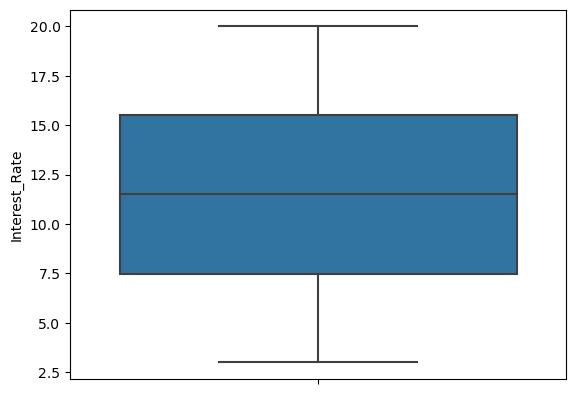

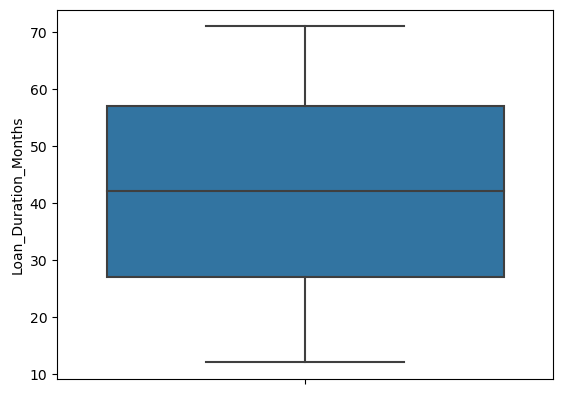

In [12]:
# Check for outliers(Since the above distribution graphs are skewed, hence outliers are present
for i in continuous_numerical_data:
    sns.boxplot(data = data, y=i)
    plt.show()

In [13]:
data['Income'] = np.sqrt(data['Income'])

<Axes: >

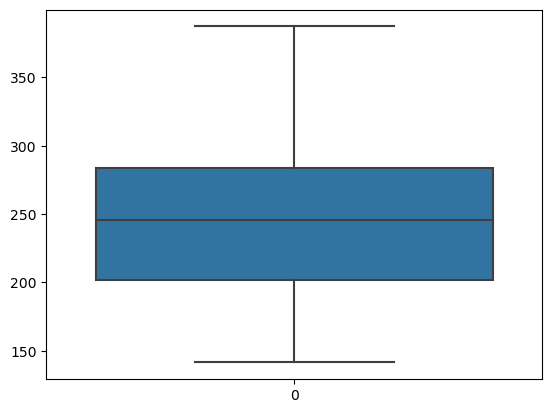

In [14]:
sns.boxplot(data['Income'])

<Axes: >

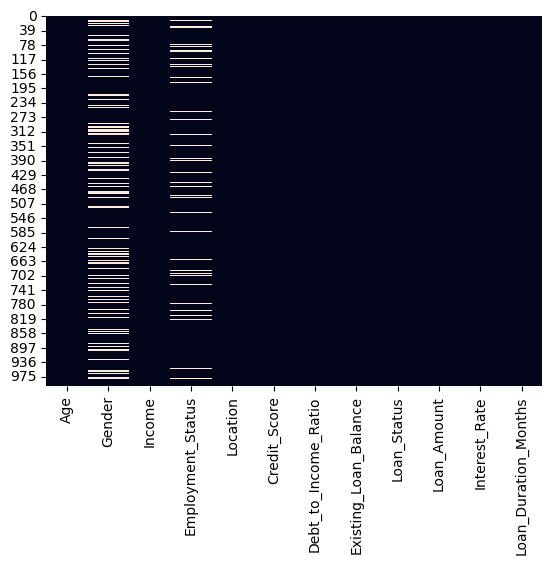

In [15]:
# checking for the null values
sns.heatmap(data.isnull(), cbar=False)

In [16]:
# Since there are null values in categorical values, so we replace them with mode of that feature.
for i in categorical_data:
    data[i] = data[i].fillna(data[i].mode().iloc[0])

<Axes: >

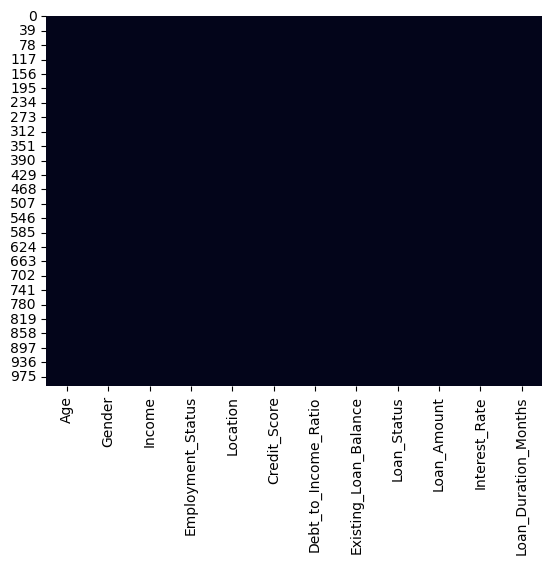

In [17]:
sns.heatmap(data.isnull(), cbar=False)

In [18]:
# converting categorical data into numerical data
data['Employment_Status'] = data['Employment_Status'].replace(('Employed', 'Unemployed'),(1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Non-Default', 'Default'),(1,0))
data['Location'] = data['Location'].replace(('Urban', 'Suburban','Rural'),(1,1,0))
data['Gender'] = data['Gender'].replace(('Male', 'Female'),(1,0))



In [19]:
data.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,1,266.957122,1,1,639,0.007142,27060.188289,1,13068.330587,18.185533,59
1,46,0,193.088204,1,1,474,0.456731,40192.994312,0,15159.338369,11.727471,69
2,32,1,263.755638,1,1,750,0.329231,25444.262759,0,6131.287659,17.030462,69
3,60,0,268.358133,1,0,435,0.052482,3122.213749,1,37531.880251,16.868949,26
4,25,0,179.337638,0,1,315,0.450236,19197.350445,1,41466.397989,18.891582,66


In [20]:
# Correlation Matrix
data.corr()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
Age,1.000000,0.019046,0.027048,-0.005183,-0.012585,0.020273,0.017853,-0.009584,-0.026703,0.011274,0.026231,0.058390
Gender,0.019046,1.000000,-0.016380,-0.022887,0.011880,-0.002344,0.016719,0.003164,0.018784,-0.046591,0.000102,-0.020686
Income,0.027048,-0.016380,1.000000,-0.011104,-0.004504,-0.017412,-0.023550,-0.019567,-0.047463,0.019356,-0.014654,-0.008743
Employment_Status,-0.005183,-0.022887,-0.011104,1.000000,0.018702,0.074553,0.037251,-0.010694,-0.002456,-0.029244,-0.006931,-0.011310
Location,-0.012585,0.011880,-0.004504,0.018702,1.000000,-0.038915,-0.026162,-0.059740,-0.015154,-0.018970,-0.037208,-0.016332
Credit_Score,0.020273,-0.002344,-0.017412,0.074553,-0.038915,1.000000,-0.014660,0.000330,-0.081920,-0.041100,-0.028122,-0.010250
Debt_to_Income_Ratio,0.017853,0.016719,-0.023550,0.037251,-0.026162,-0.014660,1.000000,-0.014891,-0.003447,-0.016690,0.025956,0.017012
Existing_Loan_Balance,-0.009584,0.003164,-0.019567,-0.010694,-0.059740,0.000330,-0.014891,1.000000,-0.023138,-0.004777,0.010786,0.061004
Loan_Status,-0.026703,0.018784,-0.047463,-0.002456,-0.015154,-0.081920,-0.003447,-0.023138,1.000000,0.009476,-0.007960,-0.029639
Loan_Amount,0.011274,-0.046591,0.019356,-0.029244,-0.018970,-0.041100,-0.016690,-0.004777,0.009476,1.000000,0.093929,0.036979


In [21]:
skewness_values = data.skew()
skewness_values

Age                     -0.046883
Gender                   0.438809
Income                  -0.114363
Employment_Status       -0.822868
Location                -0.639164
Credit_Score             0.039758
Debt_to_Income_Ratio     0.051214
Existing_Loan_Balance   -0.063747
Loan_Status             -1.541938
Loan_Amount             -0.037848
Interest_Rate           -0.037246
Loan_Duration_Months    -0.015228
dtype: float64

Age
-0.046812866648668156


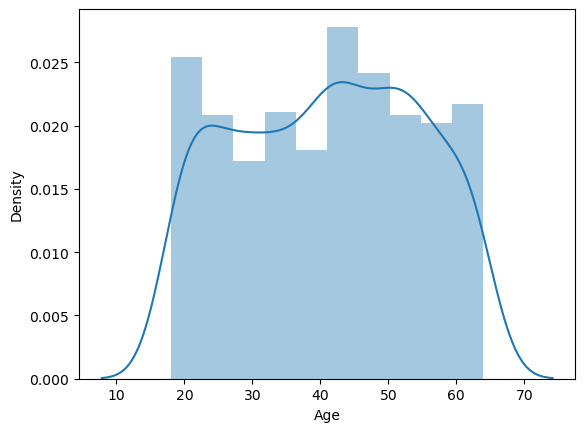

Gender
0.4381503395829213


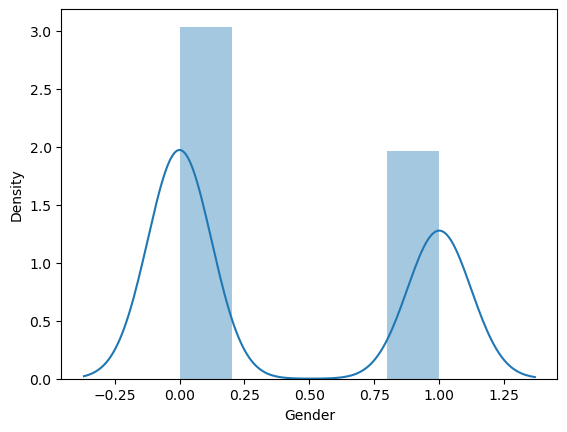

Income
-0.1141914984643958


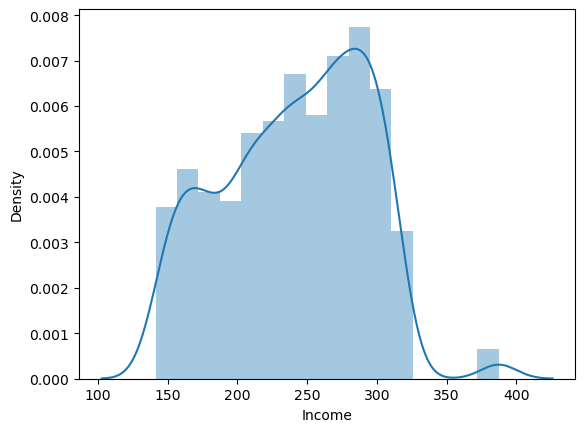

Employment_Status
-0.8216336251223798


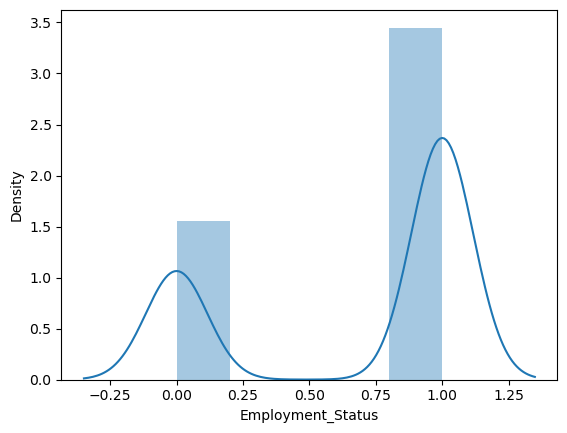

Location
-0.6382049433208336


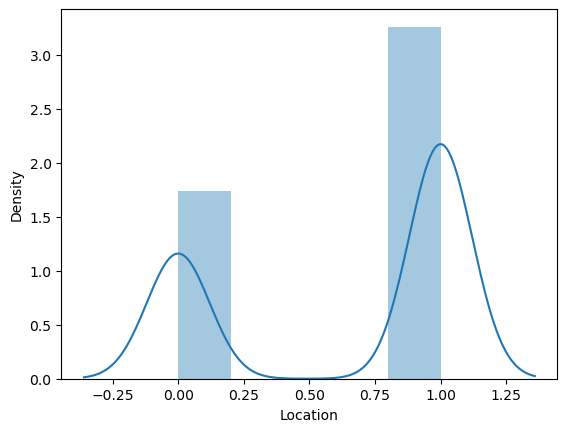

Credit_Score
0.039698378655851234


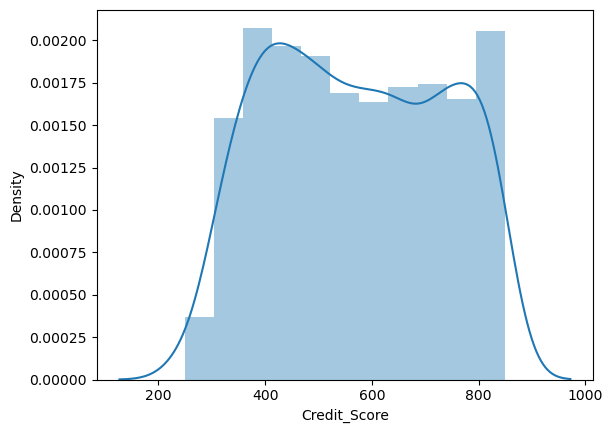

Debt_to_Income_Ratio
0.05113701875572516


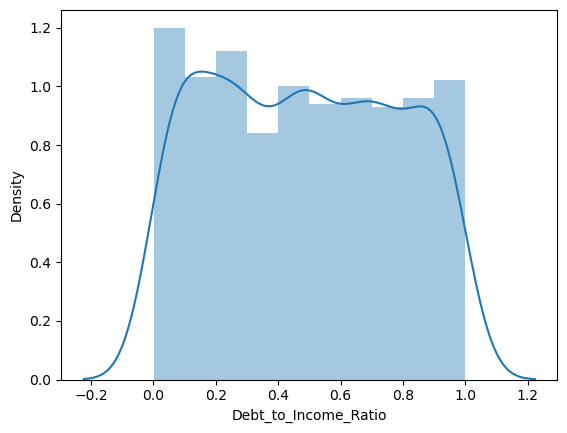

Existing_Loan_Balance
-0.06365176323964228


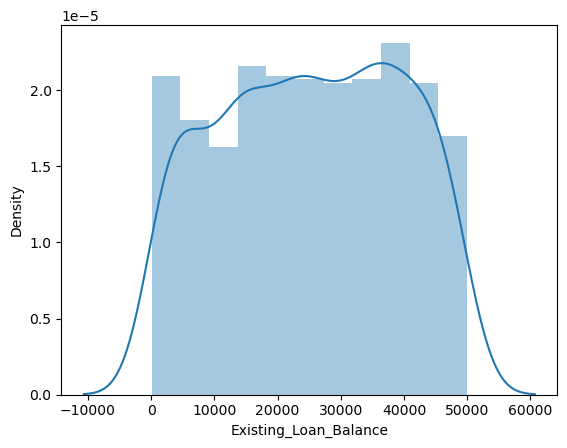

Loan_Status
-1.5396237050168615


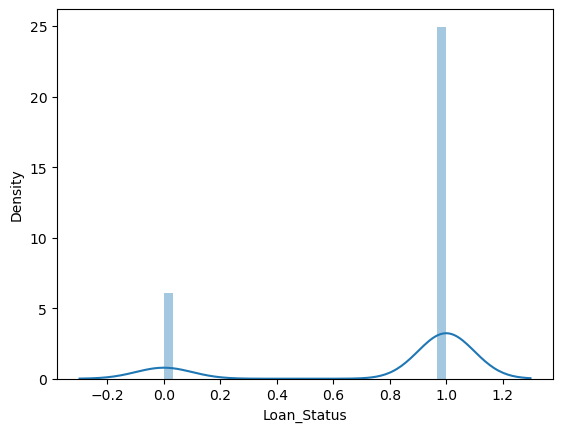

Loan_Amount
-0.0377912220552461


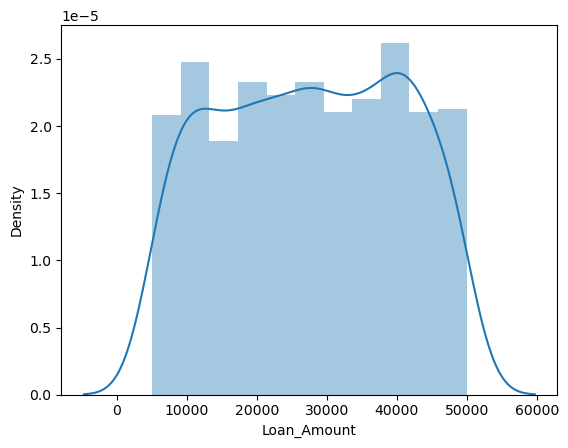

Interest_Rate
-0.037190303013452185


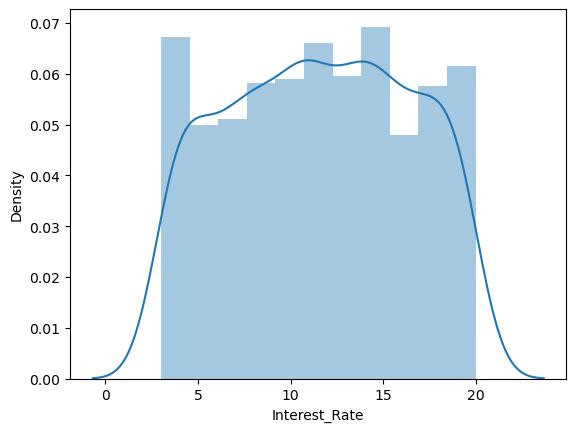

Loan_Duration_Months
-0.015204792660817798


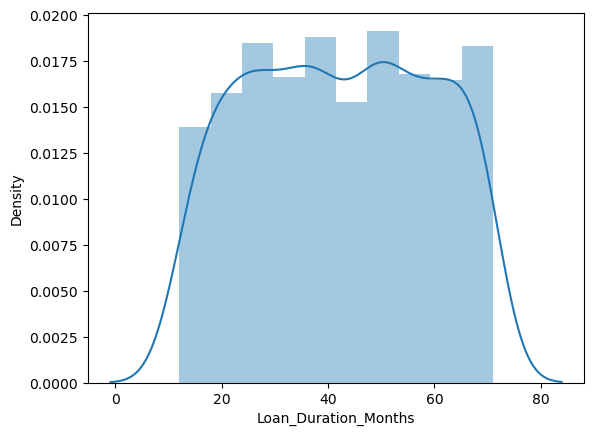

In [22]:
#visualizing the skewness
from scipy.stats import skew
for col in data:
    print(col)
    print(skew(data[col]))
    
    plt.figure()
    sns.distplot(data[col])
    plt.show()

<Axes: >

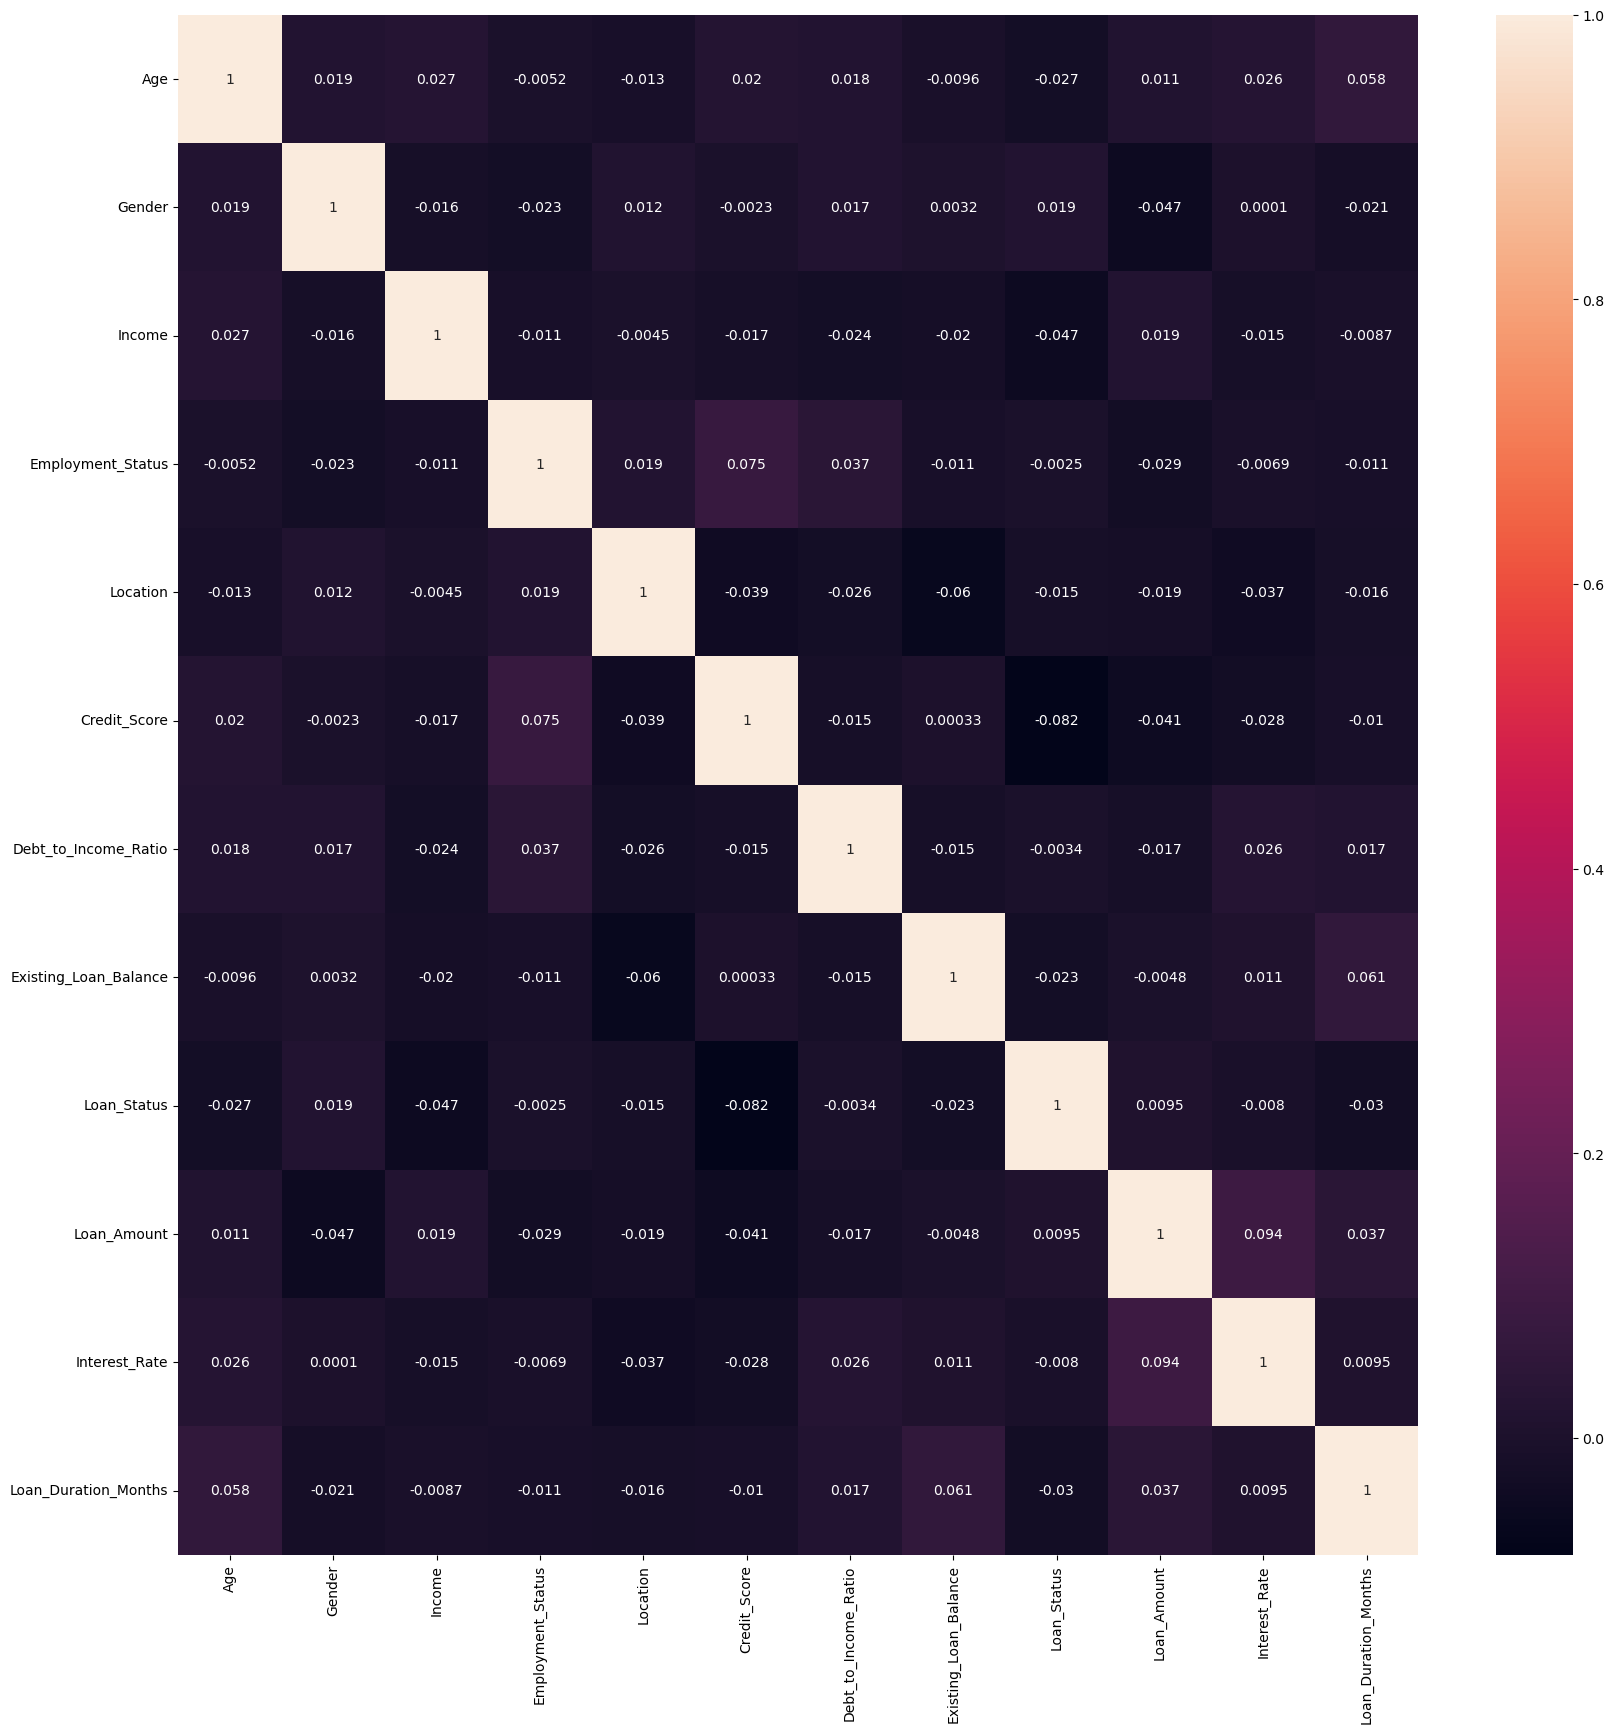

In [23]:
# visualizing correlation matrix
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot=True)

In [24]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features = correlation(data, 0.8)
len(set(corr_features))

0

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   int64  
 2   Income                 1000 non-null   float64
 3   Employment_Status      1000 non-null   int64  
 4   Location               1000 non-null   int64  
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   int64  
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 93.9 KB


In [27]:
# X,y = data.drop(columns = "Loan_Status"),data["Loan_Status"]
# # Initialize the SMOTE object
# smote= SMOTE(sampling_strategy='auto', random_state=42)

# # Fit and apply SMOTE to the training data
# X_resampled, y_resampled  = SMOTE().fit_resample(X, y.values.ravel())
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# # Logistic Regression
# model = LogisticRegression()
# model.fit(X_train,y_train)
# print("Accuracy of Logistic Regression Model is ",model.score(X_test,y_test)*100)
# y_pred = model.predict(X_test)
# auc_score = roc_auc_score(y_test, y_pred)

# print("AUROC Score:", auc_score)
# score = cross_val_score(model, X, y, cv=5)
# print("Cross validation is",np.mean(score)*100)

In [28]:
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
# # Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Fitting logistic regression model
# model = LogisticRegression()
# model.fit(X_train_scaled, y_train)

# # Extracting feature importance
# feature_importance = abs(model.coef_[0])
# feature_names = X.columns

# # Creating DataFrame to store feature importance
# df_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
# df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

# # Printing feature importance
# print(df_feature_importance)

In [29]:
# X,y = data[["Gender","Employment_Status","Location","Credit_Score","Income"]],data["Loan_Status"]
# # Initialize the SMOTE object
# smote= SMOTE(sampling_strategy='auto', random_state=42)

# # Fit and apply SMOTE to the training data
# X_resampled, y_resampled  = SMOTE().fit_resample(X, y.values.ravel())
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# model = LogisticRegression(random_state=1)
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# auc_score = roc_auc_score(y_test, y_pred)

# print("AUROC Score:", auc_score)


In [30]:
X = data.drop(columns=['Loan_Status'], axis=1)
y = data['Loan_Status']

# Initialize the SMOTE object
smoteenn= SMOTEENN(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE to the training data
X_resampled, y_resampled = SMOTEENN().fit_resample(X, y.values.ravel()) 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42) 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators= 1000, max_depth = 3, max_features='sqrt',random_state=42) 
model.fit(X_train,y_train)

y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
conf_matrix = confusion_matrix(y_test, y_pred) 
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}') 
print('Confusion Matrix:\n', conf_matrix) 
print("Classification Report:\n",classification_rep) 
auc_score = roc_auc_score(y_test, y_pred)

print("AUROC Score:", auc_score)

Accuracy: 0.7322834645669292
Confusion Matrix:
 [[67 16]
 [18 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        83
           1       0.62      0.59      0.60        44

    accuracy                           0.73       127
   macro avg       0.70      0.70      0.70       127
weighted avg       0.73      0.73      0.73       127

AUROC Score: 0.6990690032858707


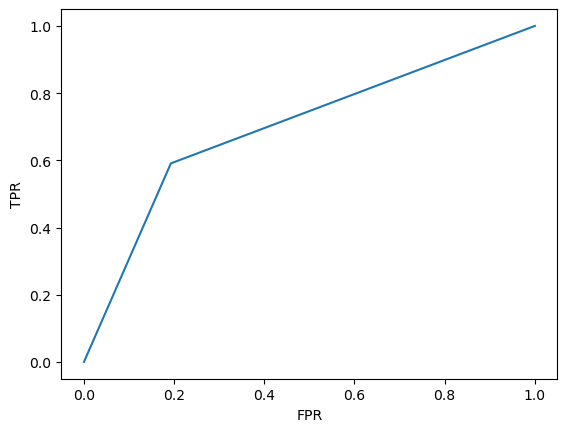

In [31]:
from sklearn.metrics import roc_curve
y_pred=model.predict(X_test)
fpr,tpr,thresholds=roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [32]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Define the hyperparameter grid
# param_dist = {
#     'n_estimators': randint(10, 1000),  # Number of trees in the forest
#     'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at every split
#     'max_depth': randint(3, 20),  # Maximum depth of the tree
#     'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
#     'bootstrap': [True, False]  # Method of selecting samples for training each tree
# }

# # Create a Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=42)

# # Perform randomized search
# random_search = RandomizedSearchCV(estimator=rf_classifier,
#                                    param_distributions=param_dist,
#                                    n_iter=100,  # Number of parameter settings that are sampled
#                                    cv=5,  # Cross-validation folds
#                                    verbose=2,
#                                    n_jobs=-1)  # Use all available cores

# # Fit the model to data
# random_search.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# # Print the best parameters
# print("Best parameters found: ", random_search.best_params_)

# # Get the best model
# best_rf_model = random_search.best_estimator_

# # # Evaluate the best model on test data
# # accuracy = best_rf_model.score(X_test, y_test)  # Assuming X_test and y_test are your test data
# # print("Accuracy of best model on test data: ", accuracy)


# bootstrap=True, max_depth= 18, max_features='sqrt', min_samples_leaf=1,
#                                min_samples_split=3, n_estimators=890

In [33]:
# X = data.drop(columns=['Loan_Status'], axis=1)
# y = data['Loan_Status']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the Random Forest Classifier
# clf = RandomForestClassifier(random_state=42)

# # Define the hyperparameter distributions to sample from
# param_dist = {"max_depth":[15,None,10],
#           "max_features":[3,"auto",2],
#           "min_samples_split":[2,8,15],
#           "n_estimators":[100,1000,200]}


# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(clf, param_dist, n_iter=100, cv=5, scoring='roc_auc', random_state=42)

# # Perform randomized search
# random_search.fit(X_train, y_train)

# # Get the best estimator and its parameters
# best_clf = random_search.best_estimator_
# best_params = random_search.best_params_

# # Predict probabilities on the test set using the best classifier
# y_probs = best_clf.predict_proba(X_test)[:, 1]

# # Calculate AUROC score
# auroc_score = roc_auc_score(y_test, y_probs)
# print("Best parameters:", best_params)
# print("AUROC score:", auroc_score)


Feature Importance:
                  Feature  Importance
6    Debt_to_Income_Ratio    0.133120
8             Loan_Amount    0.131316
7   Existing_Loan_Balance    0.129042
5            Credit_Score    0.127753
2                  Income    0.120471
9           Interest_Rate    0.114026
10   Loan_Duration_Months    0.102502
0                     Age    0.092306
4                Location    0.017840
1                  Gender    0.016690
3       Employment_Status    0.014934


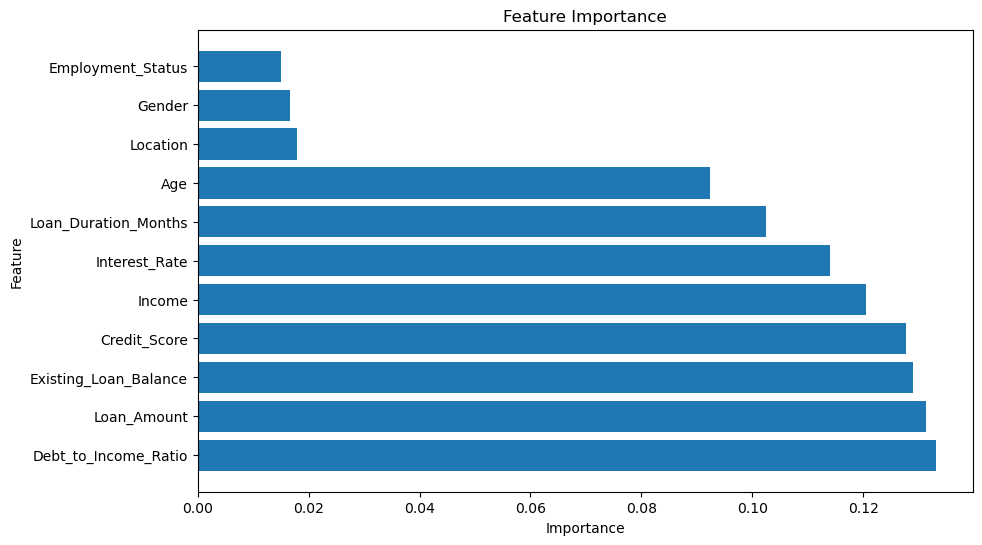

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X_resampled = data.drop(columns=['Loan_Status'], axis=1)
rf_classifier = RandomForestClassifier()

# Train the classifier on your data
rf_classifier.fit(X, y)
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature':X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance:")
print(feature_importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [35]:
data.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,1,266.957122,1,1,639,0.007142,27060.188289,1,13068.330587,18.185533,59
1,46,0,193.088204,1,1,474,0.456731,40192.994312,0,15159.338369,11.727471,69
2,32,1,263.755638,1,1,750,0.329231,25444.262759,0,6131.287659,17.030462,69
3,60,0,268.358133,1,0,435,0.052482,3122.213749,1,37531.880251,16.868949,26
4,25,0,179.337638,0,1,315,0.450236,19197.350445,1,41466.397989,18.891582,66


In [36]:
columns_to_delete = [0,1,3,4,11]

# If df is your DataFrame
data.drop(data.columns[columns_to_delete], axis=1, inplace=True)

In [37]:
data.head()

,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate
0,266.957122,639,0.007142,27060.188289,1,13068.330587,18.185533
1,193.088204,474,0.456731,40192.994312,0,15159.338369,11.727471
2,263.755638,750,0.329231,25444.262759,0,6131.287659,17.030462
3,268.358133,435,0.052482,3122.213749,1,37531.880251,16.868949
4,179.337638,315,0.450236,19197.350445,1,41466.397989,18.891582


In [38]:
from imblearn.combine import SMOTEENN
X = data.drop(columns=['Loan_Status'], axis=1)
y= data['Loan_Status']  
# Initialize the SMOTE object
smoteenn= SMOTEENN(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE to the training data
X_resampled, y_resampled  = SMOTEENN().fit_resample(X, y.values.ravel())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(bootstrap=True, max_depth= 18, max_features='sqrt', min_samples_leaf=1,
                               min_samples_split=3, n_estimators=890)
model.fit(X_train,y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
# print('Confusion Matrix:\n', conf_matrix)
# print("Classification Report:\n",classification_rep)
auc_score = roc_auc_score(y_test, y_pred)

print("AUROC Score:", auc_score)


Accuracy: 0.8712121212121212
AUROC Score: 0.8587509077705158


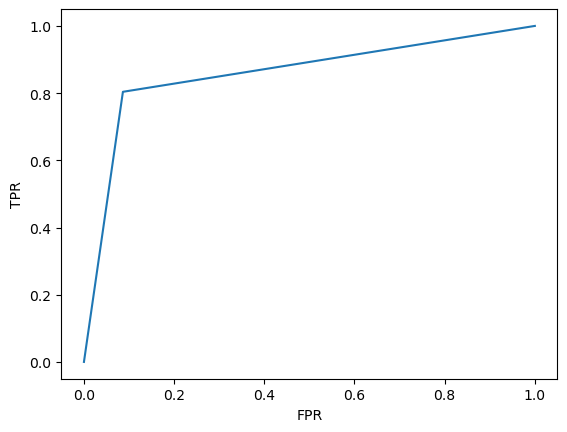

In [39]:
from sklearn.metrics import roc_curve
y_pred=model.predict(X_test)
fpr,tpr,thresholds=roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [40]:
from sklearn.inspection import permutation_importance
# X= data[['Debt_to_Income_Ratio','Credit_Score','Loan_Amount','Income','Existing_Loan_Balance','Interest_Rate']]
# y= data['Loan_Status'] 
# Calculate permutation importances
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# # Get feature names
# feature_names = X.feature_names

# # Display feature importances
# for i, feature in enumerate(feature_names):
#     print(f"{feature}: {perm_importance.importances_mean[i]}")
# Display feature importances
for i, feature in enumerate(X.columns):
    print(f"{feature}: {perm_importance.importances_mean[i]}")


Income: 0.08030303030303033
Credit_Score: 0.09166666666666667
Debt_to_Income_Ratio: 0.06893939393939395
Existing_Loan_Balance: 0.18863636363636366
Loan_Amount: 0.16666666666666666
Interest_Rate: 0.0590909090909091
